In [120]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [121]:
heart=pd.read_csv(r"/Users/souravghoshhansda/Library/CloudStorage/OneDrive-Personal/data exploration/Heart_Disease.csv")

In [122]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [123]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)Heart

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='target', ylabel='count'>

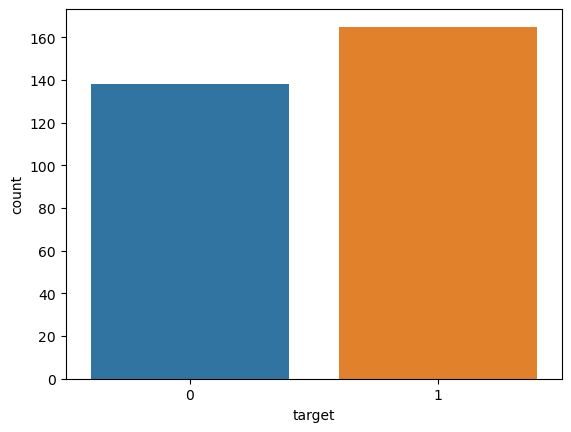

In [124]:
sns.countplot(x='target',data=heart)

In [125]:
count_no_disease=len(heart[heart.target==0])
count_no_disease

138

In [126]:
count_have_disease=len(heart[heart.target==1])
count_have_disease

165

In [127]:
#find the percentage of inviduals having heart disease and not having heart disease
print("no Heart Disease %: {:.2f}%".format((count_no_disease / (len(heart.target))*100)))

no Heart Disease %: 45.54%


In [128]:
print("Having Heart Disease %: {:.2f}%".format((count_have_disease / (len(heart.target))*100)))

Having Heart Disease %: 54.46%


In [129]:
#find the percentage of male patients
print("Male Patients  %: {:.2f}%".format((male_patients / (len(heart.target))*100)))

Male Patients  %: 68.32%


In [130]:
#find the percentage of female patients
print("Female Patients %: {:.2f}%".format((female_patients / (len(heart.target))*100)))

Female Patients %: 31.68%


In [131]:
male_patients=len(heart[heart.sex==1])
male_patients

207

In [132]:
female_patients=len(heart[heart.sex==0])
female_patients

96

In [133]:
#find the percentage of female patients
print("Female Patients %: {:.2f}%".format((len(heart[heart.sex==0]) / (len(heart.target))*100)))

Female Patients %: 31.68%


In [134]:
# male patients who are suffering from heart disease
countmaleTarget1 = len(heart[(heart['sex'] == 1) & (heart['target'] == 1)])
countmaleTarget1

93

In [135]:
#find the percentage of male patients who are suffering from heart disease
print("Male Patients  %: {:.2f}%".format((countmaleTarget1 / male_patients*100)))

Male Patients  %: 44.93%


In [136]:
# female patients who are suffering from heart disease
countfemaleTarget1 = len(heart[(heart['sex'] == 0) & (heart['target'] == 1)])
countfemaleTarget1

72

In [137]:
#find the percentage of female patients who are suffering from heart disease
print("Female Patients  %: {:.2f}%".format((countfemaleTarget1 / female_patients*100)))
#females are grossly risky to the occurence of heart disease

Female Patients  %: 75.00%


In [138]:
heart.groupby('target').mean()
#data patterns of target=1 vs target=0 with respect to other features in the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [139]:
heart.groupby('target').median()
#data patterns of target=1 vs target=0 with respect to other features in the data
#This is suitable when data has outliers and additionally the categorical nature of the columns are retained in the output helping us to conclude all data patterns with respect to target easily.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,58.0,1.0,0.0,130.0,249.0,0.0,0.0,142.0,1.0,1.4,1.0,1.0,3.0
1,52.0,1.0,2.0,130.0,234.0,0.0,1.0,161.0,0.0,0.2,2.0,0.0,2.0


In [140]:
heart.shape

(303, 14)

In [141]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [142]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [143]:
heart.isnull().sum()
#no missing values in data set

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

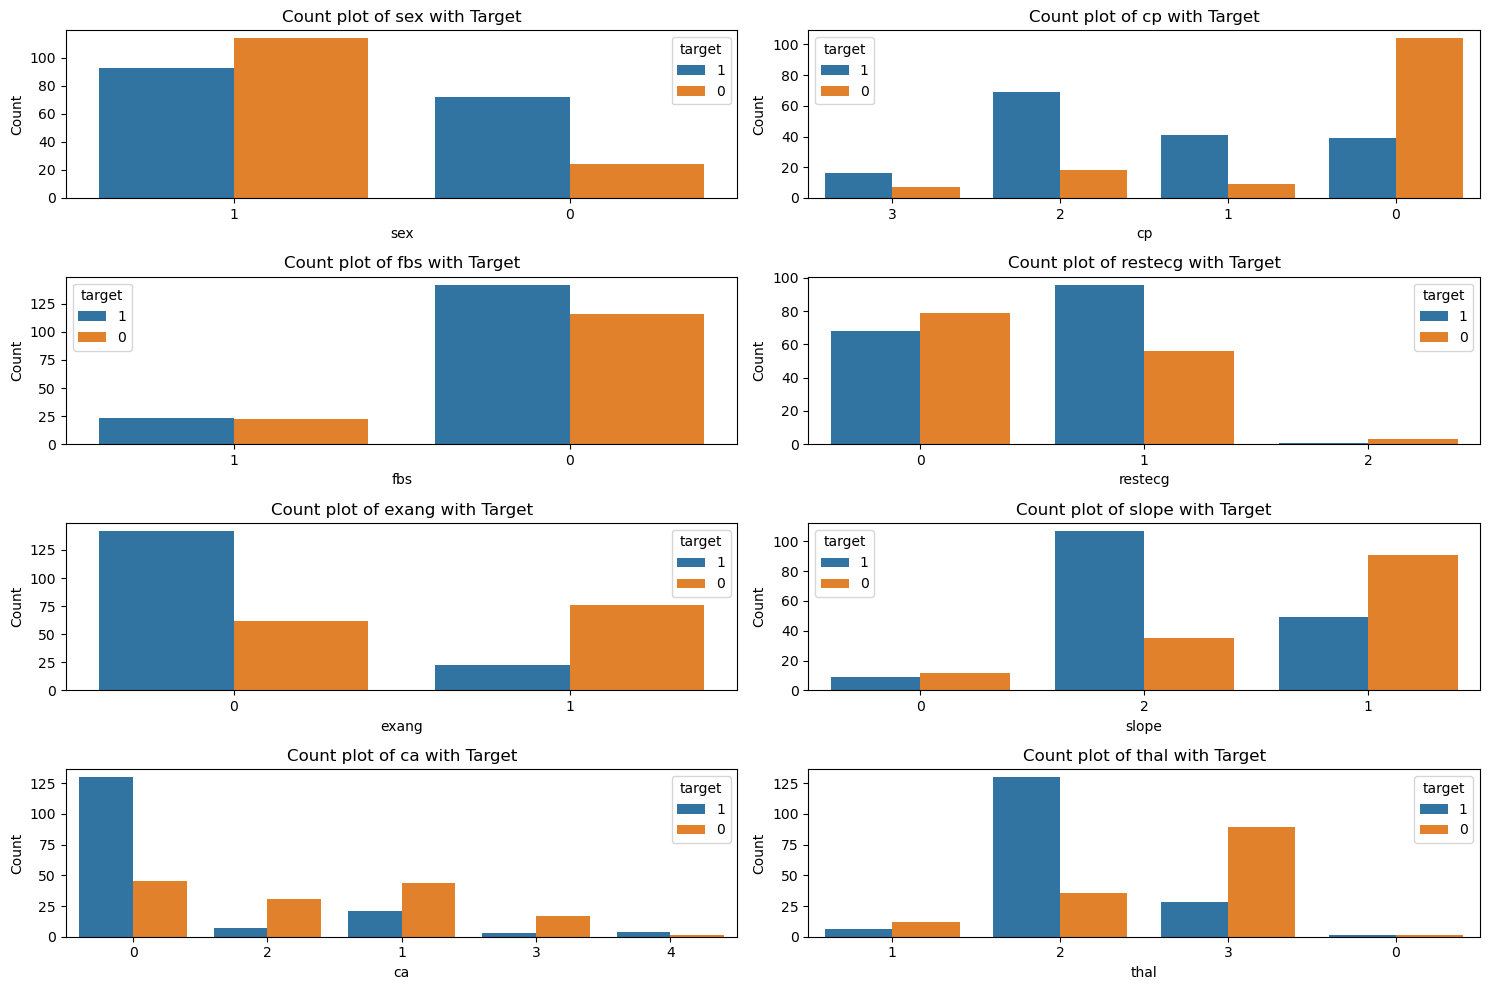

In [144]:
#checking the inter relationship of all the features with the target variable to understand the importance of the feature columns
features = ['sex', 'cp', 'fbs', 'restecg', 
             'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)#4 rows, 2 columns
    sns.countplot(x=feature, hue='target', data=heart.astype(str))
    plt.title(f'Count plot of {feature} with Target')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()
#hw:write the insights from this output to explain which of the 8 features are impacted by target and which are not

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

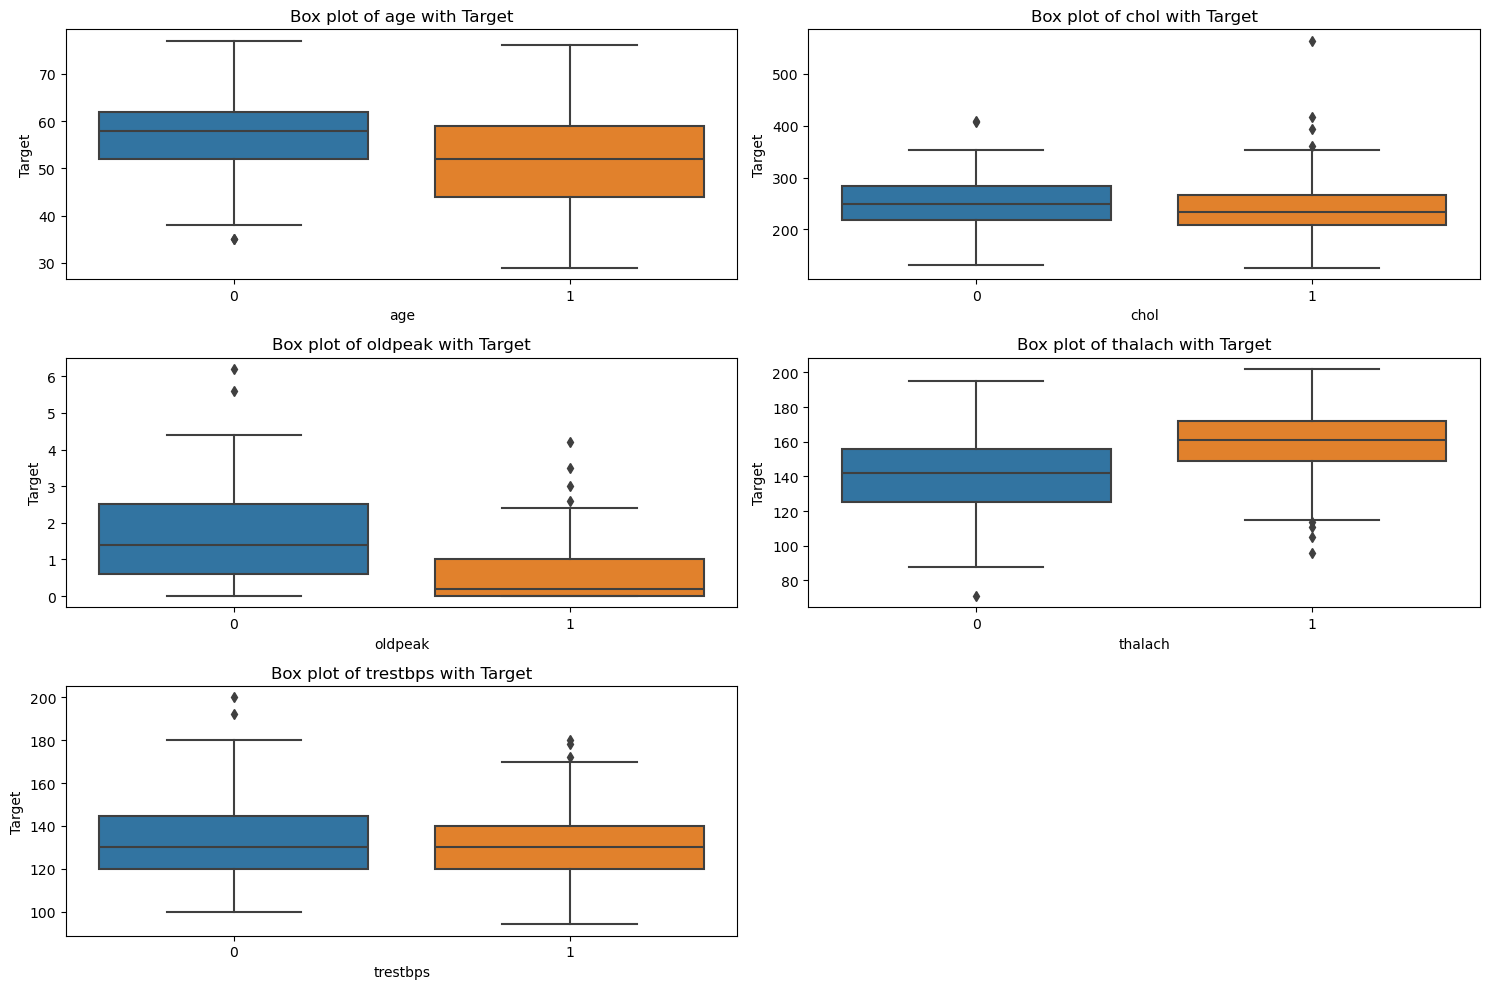

In [145]:
features = ['age', 'chol', 'oldpeak', 'thalach', 
             'trestbps']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)#3 rows, 2 columns
    sns.boxplot(y=feature, x='target', data=heart)
    plt.title(f'Box plot of {feature} with Target')
    plt.xlabel(feature)
    plt.ylabel('Target')

plt.tight_layout()
plt.show()
#hw:write the insights from this output to explain which of the 5 features are impacted by target and which are not

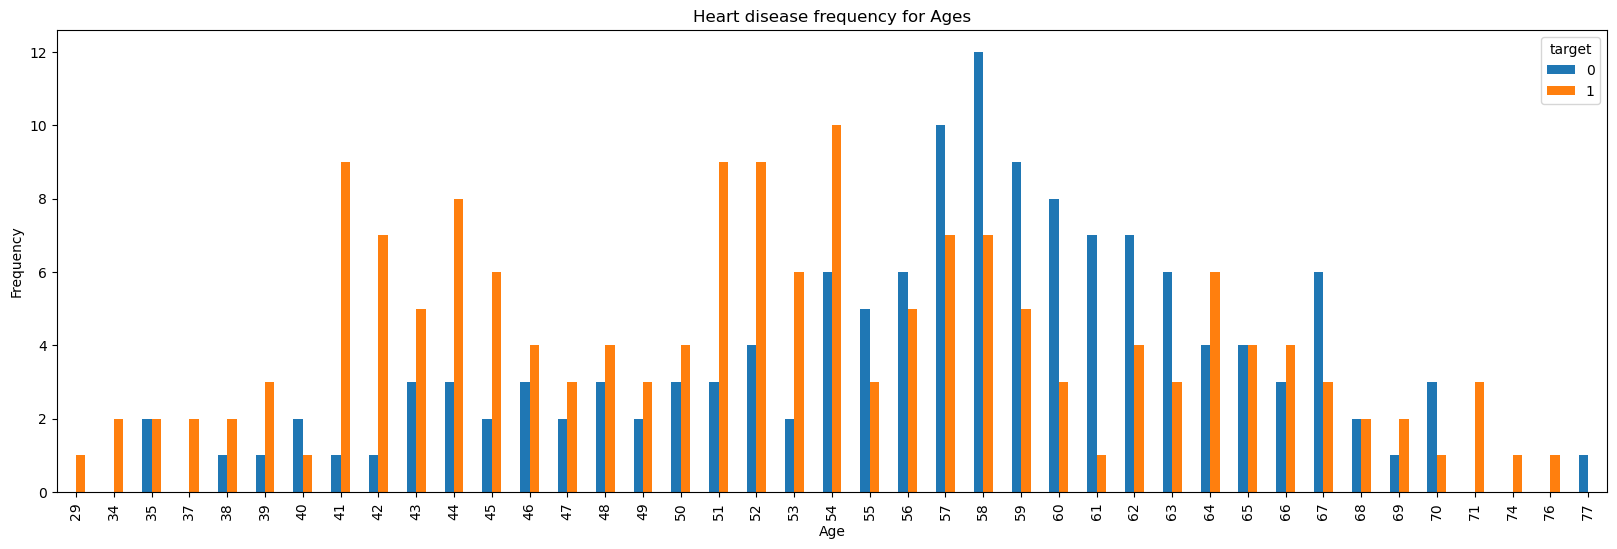

In [146]:
#find the cross tab for age vs target and showcase through a visualization what is the frequency of heart disease occurence with respect to different ages
pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart disease frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('Heart disease frequency for Ages.png')#how to save an image in python

In [147]:
pd.crosstab(heart.age,heart.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


Individuals around 50-55 years are more likely to get affected with heart disease

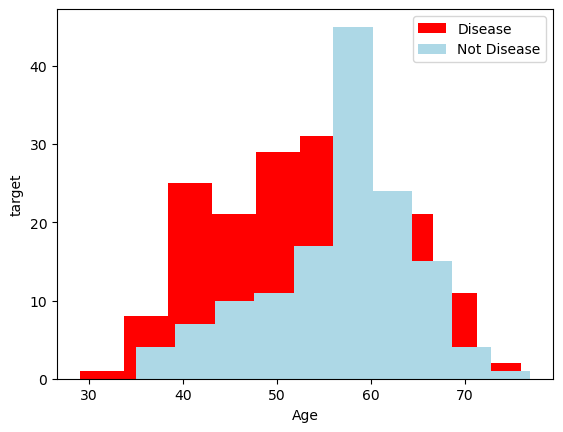

In [148]:
plt.hist(x=heart.age[heart.target==1],  color ="red")
plt.hist(x=heart.age[heart.target==0],  color ="lightblue")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("target")
plt.show()

In [149]:
#cross tab of cp vs target
pd.crosstab(heart.cp,heart.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

AttributeError: 'numpy.int64' object has no attribute 'startswith'

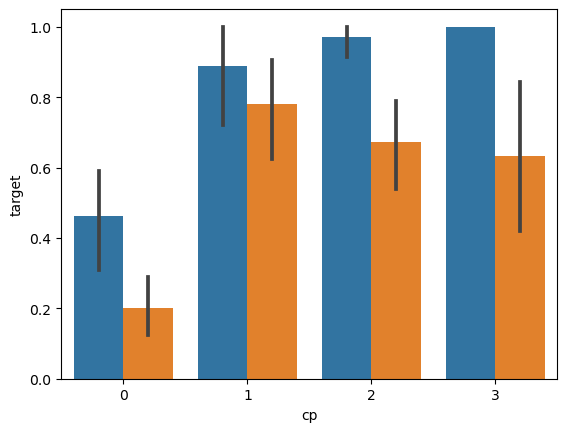

In [150]:
sns.barplot(x='cp',y='target',hue='sex',data=heart)

The error 'AttributeError: 'numpy.int64' object has no attribute 'startswith'
'needs to be resolved by treating the columns as data=heart.astype(str). However that resolution will add an issue to convert the variables into string. BarPlot won't support that unlike CountPlot because BarPlot needs at least 1 numeric variable for it to be represented.

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

<Axes: xlabel='cp', ylabel='count'>

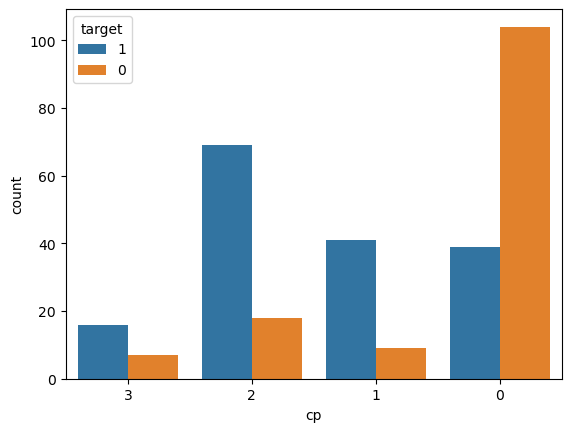

In [151]:
sns.countplot(x='cp',hue='target',data=heart.astype(str))

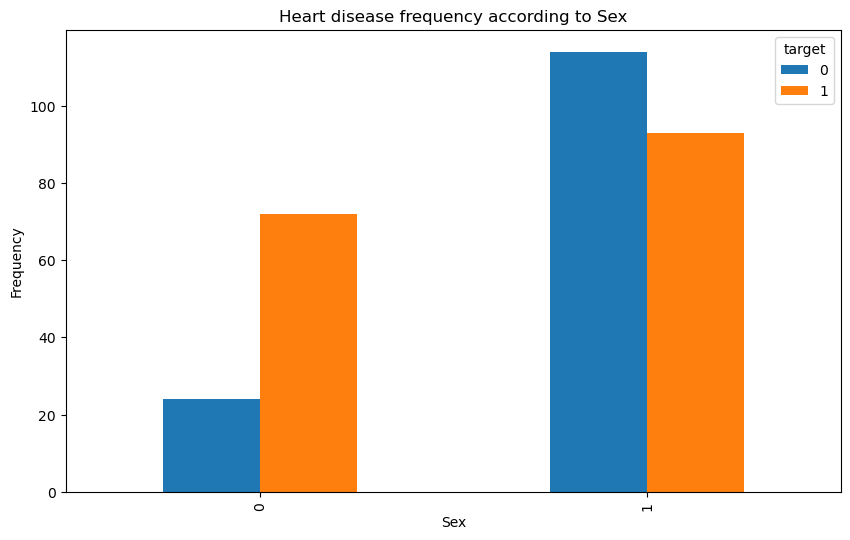

In [152]:
#cross tab sex vs target
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(10,6))
plt.title('Heart disease frequency according to Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.savefig('Heart disease frequency according to Sex.png')#how to save an image in python


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

<Axes: xlabel='age', ylabel='thalach'>

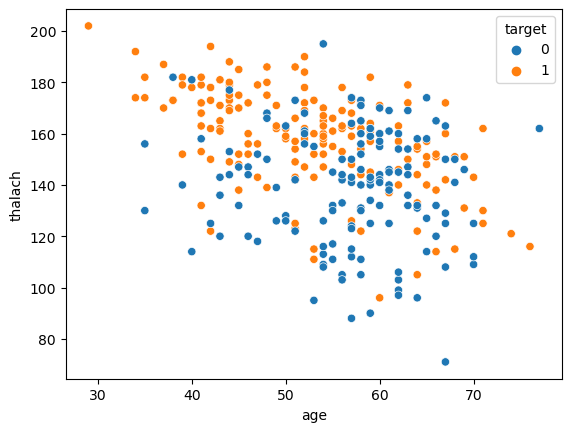

In [153]:
#find the scatterplot of age vs target with respect to thalach
sns.scatterplot(x='age',y='thalach',data=heart,hue='target')

In [154]:
heart.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

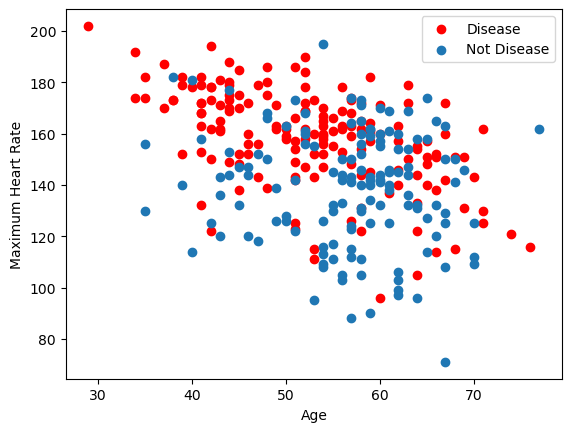

In [155]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="red")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

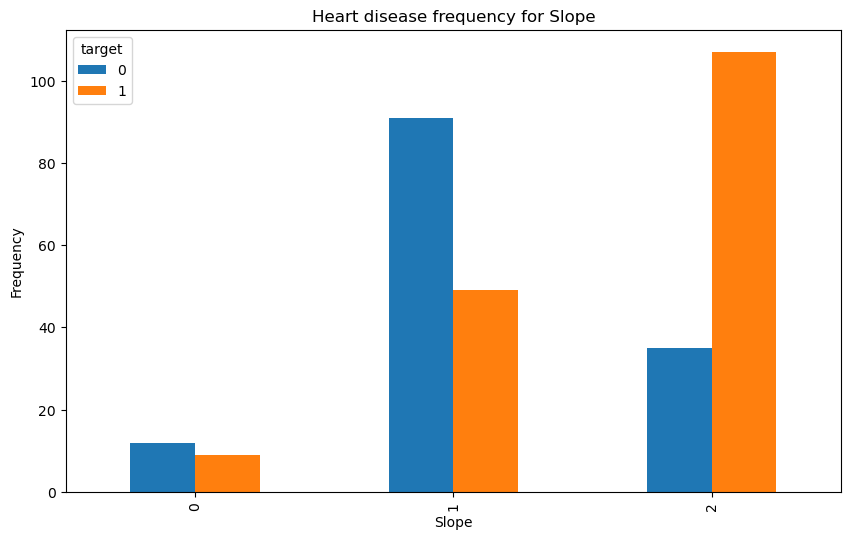

In [156]:
#cross tab slope vs target
pd.crosstab(heart.slope,heart.target).plot(kind="bar",figsize=(10,6))
plt.title('Heart disease frequency for Slope')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.savefig('Heart disease frequency for Slope.png')#how to save an image in python

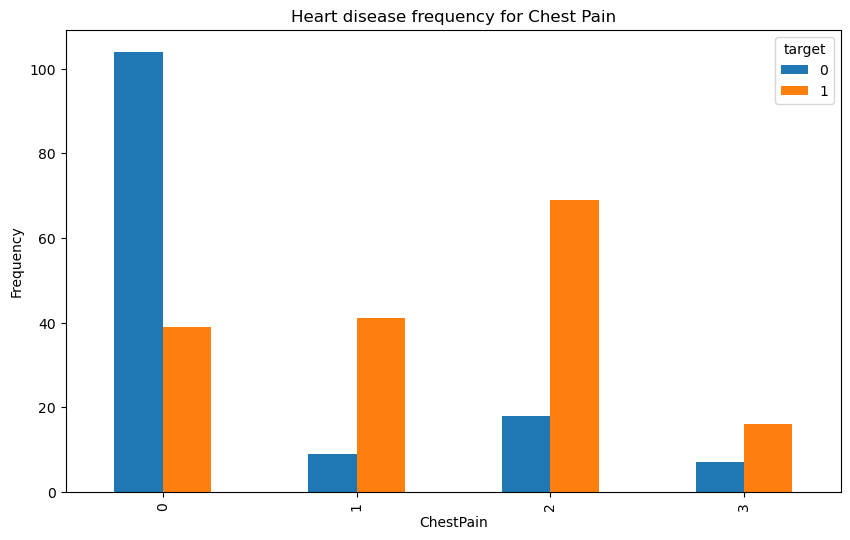

In [157]:
#cross tab cp vs target
pd.crosstab(heart.cp,heart.target).plot(kind="bar",figsize=(10,6))
plt.title('Heart disease frequency for Chest Pain')
plt.xlabel('ChestPain')
plt.ylabel('Frequency')
plt.savefig('Heart disease frequency for ChestPain.png')#how to save an image in python

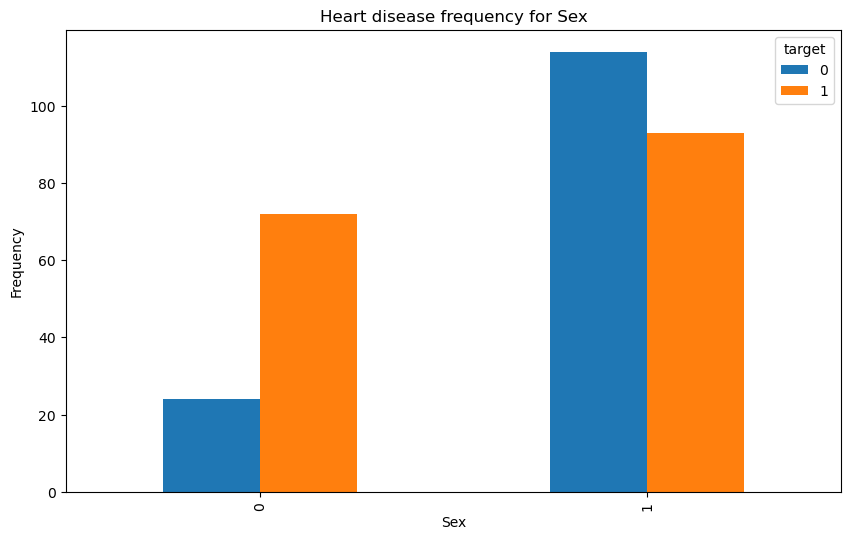

In [158]:
#cross tab sex vs target
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(10,6))
plt.title('Heart disease frequency for Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.savefig('Heart disease frequency for Sex.png')#how to save an image in python

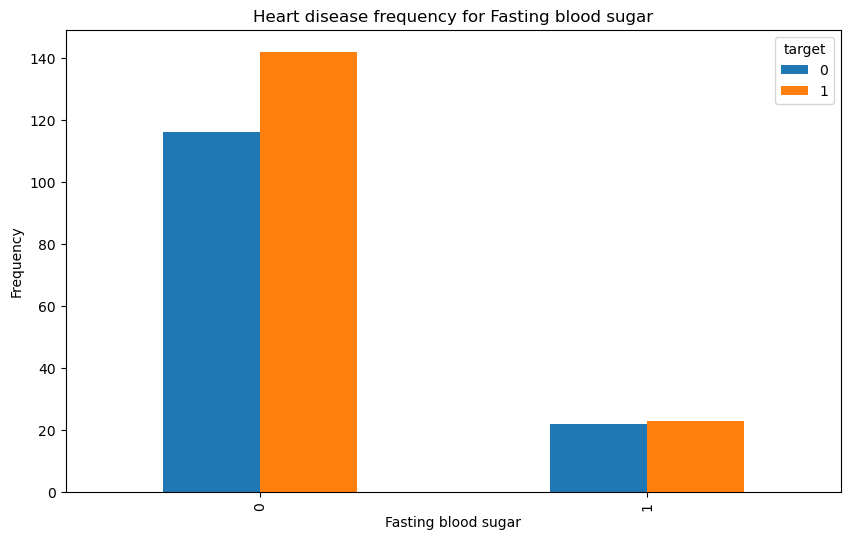

In [159]:
#cross tab fbs vs target
pd.crosstab(heart.fbs,heart.target).plot(kind="bar",figsize=(10,6))
plt.title('Heart disease frequency for Fasting blood sugar')
plt.xlabel('Fasting blood sugar')
plt.ylabel('Frequency')
plt.savefig('Heart disease frequency for Fasting blood sugar.png')#how to save an image in python

In [160]:
heart.fbs.value_counts()


fbs
0    258
1     45
Name: count, dtype: int64

In [161]:
heart.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [162]:
heart.slope.value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

In [163]:
heart.thal.value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

applying one-hot encoding to slope,thal,cp to remove the inherent ordering

In [164]:
a = pd.get_dummies(heart['cp'], prefix = "cp")

In [165]:
b = pd.get_dummies(heart['slope'], prefix = "slope")

In [166]:
c = pd.get_dummies(heart['thal'], prefix = "thal")

In [167]:
frames = [heart, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,False,False,True,True,False,False,False,True,False,False
1,37,1,2,130,250,0,1,187,0,3.5,...,False,True,False,True,False,False,False,False,True,False
2,41,0,1,130,204,0,0,172,0,1.4,...,True,False,False,False,False,True,False,False,True,False
3,56,1,1,120,236,0,1,178,0,0.8,...,True,False,False,False,False,True,False,False,True,False
4,57,0,0,120,354,0,1,163,1,0.6,...,False,False,False,False,False,True,False,False,True,False


In [168]:
#dropping columns cp,thal,slope and one from each of them(slope_0,,thal_0,cp_3)
df.drop(['slope_0','thal_0','cp_3','slope','thal','cp'],axis=1,inplace=True)
df


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,1,False,False,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,1,False,False,True,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,0,1,False,True,False,False,True,False,True,False
3,56,1,120,236,0,1,178,0,0.8,0,1,False,True,False,False,True,False,True,False
4,57,0,120,354,0,1,163,1,0.6,0,1,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,0,True,False,False,True,False,False,False,True
299,45,1,110,264,0,1,132,0,1.2,0,0,False,False,False,True,False,False,False,True
300,68,1,144,193,1,1,141,0,3.4,2,0,True,False,False,True,False,False,False,True
301,57,1,130,131,0,1,115,1,1.2,1,0,True,False,False,True,False,False,False,True


In [169]:
df.astype(int)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3,0,1,0,0,1,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1,0,1,0,1,0,0,1,0,1,0
3,56,1,120,236,0,1,178,0,0,0,1,0,1,0,0,1,0,1,0
4,57,0,120,354,0,1,163,1,0,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0,0,0,1,0,0,1,0,0,0,1
299,45,1,110,264,0,1,132,0,1,0,0,0,0,0,1,0,0,0,1
300,68,1,144,193,1,1,141,0,3,2,0,1,0,0,1,0,0,0,1
301,57,1,130,131,0,1,115,1,1,1,0,1,0,0,1,0,0,0,1


In [170]:
#dividing the data set into x and y.
x_data=df.drop('target',axis=1)
y=df['target'].values

In [171]:
x_data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,False,False,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,False,False,True,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,0,False,True,False,False,True,False,True,False
3,56,1,120,236,0,1,178,0,0.8,0,False,True,False,False,True,False,True,False
4,57,0,120,354,0,1,163,1,0.6,0,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,True,False,False,True,False,False,False,True
299,45,1,110,264,0,1,132,0,1.2,0,False,False,False,True,False,False,False,True
300,68,1,144,193,1,1,141,0,3.4,2,True,False,False,True,False,False,False,True
301,57,1,130,131,0,1,115,1,1.2,1,True,False,False,True,False,False,False,True


In [172]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

scaling=MinMaxScaler()

scaled_data=scaling.fit_transform(df)

scaled_data=pd.DataFrame(scaled_data,columns=df.columns)

scaled_data

In [173]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.111702,0.001773,0.257092,0.413121,0.001773,0.000000,0.265957,0.000000,0.004078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001773,0.000000,0.000000
1,0.065603,0.001773,0.230496,0.443262,0.000000,0.001773,0.331560,0.000000,0.006206,0.000000,0.000000,0.000000,0.001773,0.000000,0.000000,0.000000,0.001773,0.000000
2,0.072695,0.000000,0.230496,0.361702,0.000000,0.000000,0.304965,0.000000,0.002482,0.000000,0.000000,0.001773,0.000000,0.000000,0.001773,0.000000,0.001773,0.000000
3,0.099291,0.001773,0.212766,0.418440,0.000000,0.001773,0.315603,0.000000,0.001418,0.000000,0.000000,0.001773,0.000000,0.000000,0.001773,0.000000,0.001773,0.000000
4,0.101064,0.000000,0.212766,0.627660,0.000000,0.001773,0.289007,0.001773,0.001064,0.000000,0.001773,0.000000,0.000000,0.000000,0.001773,0.000000,0.001773,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.101064,0.000000,0.248227,0.427305,0.000000,0.001773,0.218085,0.001773,0.000355,0.000000,0.001773,0.000000,0.000000,0.001773,0.000000,0.000000,0.000000,0.001773
299,0.079787,0.001773,0.195035,0.468085,0.000000,0.001773,0.234043,0.000000,0.002128,0.000000,0.000000,0.000000,0.000000,0.001773,0.000000,0.000000,0.000000,0.001773
300,0.120567,0.001773,0.255319,0.342199,0.001773,0.001773,0.250000,0.000000,0.006028,0.003546,0.001773,0.000000,0.000000,0.001773,0.000000,0.000000,0.000000,0.001773
301,0.101064,0.001773,0.230496,0.232270,0.000000,0.001773,0.203901,0.001773,0.002128,0.001773,0.001773,0.000000,0.000000,0.001773,0.000000,0.000000,0.000000,0.001773


In [174]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
x_train,x_test,y_train,y_test

(          age       sex  trestbps      chol       fbs   restecg   thalach  \
 266  0.097518  0.000000  0.319149  0.579787  0.000000  0.003546  0.207447   
 215  0.076241  0.000000  0.234043  0.604610  0.001773  0.000000  0.241135   
 99   0.093972  0.001773  0.230496  0.436170  0.001773  0.000000  0.306738   
 119  0.081560  0.000000  0.244681  0.430851  0.000000  0.000000  0.269504   
 11   0.085106  0.000000  0.230496  0.487589  0.000000  0.001773  0.246454   
 ..        ...       ...       ...       ...       ...       ...       ...   
 8    0.092199  0.001773  0.304965  0.352837  0.001773  0.001773  0.287234   
 73   0.090426  0.001773  0.248227  0.462766  0.000000  0.000000  0.329787   
 118  0.081560  0.000000  0.186170  0.361702  0.000000  0.001773  0.304965   
 189  0.072695  0.001773  0.195035  0.304965  0.000000  0.000000  0.280142   
 206  0.104610  0.001773  0.195035  0.423759  0.000000  0.000000  0.251773   
 
         exang   oldpeak        ca      cp_0      cp_1      cp

In [175]:
models = []
models.append(('Logistic Regression' ,LogisticRegression(random_state=42)))
models.append(('Naive bayes', GaussianNB()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))
models.append(('XGBoost', XGBClassifier(random_state = 42)))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42)))
results = []
names = []

In [176]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.5573770491803278
Naive bayes : 0.8852459016393442
CART : 0.8688524590163934
Random Forest : 0.9016393442622951
SVM : 0.5081967213114754
XGBoost : 0.8852459016393442
GradientBoosting : 0.819672131147541


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

In [177]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        precision = precision_score(y_test, y_pred)*100
        print('Precision_score')
        print("{} : {:.2f}%".format(name,precision))

Precision_score

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur


Logistic Regression : 53.45%
Precision_score
Naive bayes : 92.86%
Precision_score
CART : 84.85%
Precision_score
Random Forest : 87.88%
Precision_score
SVM : 50.82%
Precision_score
XGBoost : 87.50%
Precision_score
GradientBoosting : 83.33%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

In [178]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        recall = recall_score(y_test, y_pred)*100
        print('Recall_score')
        print("{} : {:.2f}%".format(name,recall))

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

Recall_score
Logistic Regression : 100.00%
Recall_score
Naive bayes : 83.87%
Recall_score
CART : 90.32%
Recall_score
Random Forest : 93.55%
Recall_score
SVM : 100.00%
Recall_score
XGBoost : 90.32%
Recall_score
GradientBoosting : 80.65%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

In [179]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        f1 = f1_score(y_test, y_pred)*100
        print('f1_score')
        print("{} : {:.2f}%".format(name,f1))

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

f1_score
Logistic Regression : 69.66%
f1_score
Naive bayes : 88.14%
f1_score
CART : 87.50%
f1_score
Random Forest : 90.62%
f1_score
SVM : 67.39%
f1_score
XGBoost : 88.89%
f1_score
GradientBoosting : 81.97%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

In [180]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        confusion = confusion_matrix(y_test, y_pred)
        print("{} : {}".format(name,confusion))
        print('----------------------------------')

Logistic Regression : [[ 3 27]
 [ 0 31]]
----------------------------------
Naive bayes : [[28  2]
 [ 5 26]]
----------------------------------
CART : [[25  5]
 [ 3 28]]
----------------------------------
Random Forest : [[26  4]
 [ 2 29]]
----------------------------------
SVM : [[ 0 30]
 [ 0 31]]
----------------------------------
XGBoost : [[26  4]
 [ 3 28]]
----------------------------------
GradientBoosting : [[25  5]
 [ 6 25]]
----------------------------------


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

Random Forest:- TN=23,FP=4,FN=5,TP=29

Precision=TP/(TP+FP)=29/(29+4)=0.87878788

Recall=TP/(TP+FN)=29/(29+5)=0.85294118

In [181]:
#applying default random forest
rf=RandomForestClassifier(random_state=5)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=5)

In [182]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [183]:
accuracy_rf= accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9016393442622951

In [184]:
test_score_rf=rf.score(x_test,y_test)
test_score_rf

0.9016393442622951

In [185]:
train_score_rf=rf.score(x_train,y_train)
train_score_rf
#train score is 1 and test score is 0.85 hence it is an overfitting scenario for which let us try to apply hyper parameter tuning on random forest.

1.0

In [186]:
rf_tuned=RandomForestClassifier(random_state=0)

In [187]:
param_grid = {
    'max_depth': [2,3,5],            # Maximum depth of the tree
    'min_samples_split': [2, 3, 6],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider at each split
    'criterion': ['gini', 'entropy'],         # Split criterion: Gini impurity or entropy
    'max_leaf_nodes': [None, 10, 20, 30]       # Maximum number of leaf nodes in the tree
}

In [188]:
rf_gridsearch=GridSearchCV(rf_tuned, param_grid,cv=8, scoring='accuracy')
#['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']

In [189]:
rf_gridsearch.fit(x_train, y_train) 

GridSearchCV(cv=8, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 6]},
             scoring='accuracy')

In [190]:
best_params_rf = rf_gridsearch.best_params_
best_params_rf

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [191]:
#we are creating a new decision tree classifier with the best hyper parameters
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_leaf_nodes=10, min_samples_leaf=4)

In [192]:
y_pred_rf_tune=best_rf_classifier.predict(x_test)
y_pred_rf_tune

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [193]:
accuracy_rf_tune= accuracy_score(y_test, y_pred_rf_tune)
accuracy_rf_tune

0.9016393442622951

In [194]:
train_score_rf_tune=best_rf_classifier.score(x_train,y_train)
train_score_rf_tune

0.8677685950413223

In [195]:
test_score_rf_tune=best_rf_classifier.score(x_test,y_test)
test_score_rf_tune

0.9016393442622951

In [196]:
#decision tree with hyper parameter tuning model gives an accuracy score of 78.68% with a good fit hence finding out the evaluation metrics for this model.
recall_rf = recall_score(y_test, y_pred_rf_tune)*100
recall_rf

93.54838709677419

In [197]:
precision_rf = precision_score(y_test, y_pred_rf_tune)*100
precision_rf

87.87878787878788

In [198]:
f1_rf = f1_score(y_test, y_pred_rf_tune)*100
f1_rf

90.625

In [199]:
confusion_rf = confusion_matrix(y_test, y_pred_rf_tune)
confusion_rf

array([[26,  4],
       [ 2, 29]])

In [200]:
classification_report__random=classification_report(y_test, y_pred_rf_tune)
print(classification_report__random)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.88      0.94      0.91        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [201]:
lr=LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [202]:
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [203]:
accuracy_lr= accuracy_score(y_test, y_pred)
accuracy_lr

0.819672131147541

In [204]:
train_score_lr=lr.score(x_train,y_train)
train_score_lr

0.5578512396694215

In [205]:
test_score_lr=lr.score(x_test,y_test)
test_score_lr

0.5573770491803278

#This model is  giving 62.2950 % accuracy score with fairly good fit.However the accuracy score is towards the low side.Hence trying out other models to cross compare accuracy scores along with overfitting scenario

In [206]:
#Applying Decision Tree or Cart Model
decision=DecisionTreeClassifier()
decision.fit(x_train,y_train)

DecisionTreeClassifier()

In [207]:
y_pred_decision=decision.predict(x_test)
y_pred_decision

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [208]:
accuracy_decision= accuracy_score(y_test, y_pred_decision)
accuracy_decision

0.8524590163934426

In [209]:
train_score_decision=decision.score(x_train,y_train)
train_score_decision

1.0

In [210]:
test_score_decision=decision.score(x_test,y_test)
test_score_decision

0.8524590163934426

Decison tree with parameters has overfitting and has accuracy score of 78%

In [211]:
#applying decision tree with hyper parameter tuning
dt_classifier = DecisionTreeClassifier()

In [212]:
param_grid = {
    'max_depth': [None, 5, 10, 15],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider at each split
    'criterion': ['gini', 'entropy'],         # Split criterion: Gini impurity or entropy
    'splitter': ['best', 'random'],            # Strategy to choose the split at each node
    'max_leaf_nodes': [None, 10, 20, 30]       # Maximum number of leaf nodes in the tree
}

In [213]:
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

In [214]:
grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [215]:
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [216]:
#we are creating a new decision tree classifier with the best hyper parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=10)

In [217]:
y_pred_tune=best_dt_classifier.predict(x_test)
y_pred_tune

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [218]:
accuracy_decision_tune= accuracy_score(y_test, y_pred_tune)
accuracy_decision_tune

0.7868852459016393

In [219]:
train_score_decision_tune=best_dt_classifier.score(x_train,y_train)
train_score_decision_tune

0.7975206611570248

In [220]:
test_score_decision_tune=best_dt_classifier.score(x_test,y_test)
test_score_decision_tune

0.7868852459016393

In [221]:
#decision tree with hyper parameter tuning model gives an accuracy score of 78.68% with a good fit hence finding out the evaluation metrics for this model.
recall_decision = recall_score(y_test, y_pred_tune)*100
recall_decision

70.96774193548387

In [222]:
precision_decision = precision_score(y_test, y_pred_tune)*100
precision_decision

84.61538461538461

In [223]:
f1_decision = f1_score(y_test, y_pred_tune)*100
f1_decision

77.19298245614036

In [224]:
confusion_decision = confusion_matrix(y_test, y_pred_tune)
confusion_decision

array([[26,  4],
       [ 9, 22]])

In [225]:
classification_report__decision=classification_report(y_test, y_pred_tune)
print(classification_report__decision)

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        30
           1       0.85      0.71      0.77        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



the random forest gives accuracy:0.9016393442622951, precision:87.87878787878788,recall:93.54838709677419,f1-score:90.625 thus makes it the better model than decision tree.